In [ ]:
#importing libraries and initializing fastai 
import pandas as pd 
import numpy as np 
import time

#Mounting google drive for saving the models after training 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install textacy

     |████████████████████████████████| 200 kB 4.1 MB/s 
     |████████████████████████████████| 132 kB 59.8 MB/s 
     |████████████████████████████████| 2.0 MB 69.2 MB/s 
     |████████████████████████████████| 481 kB 83.8 MB/s 
     |████████████████████████████████| 6.0 MB 67.6 MB/s 
     |████████████████████████████████| 181 kB 70.6 MB/s 
     |████████████████████████████████| 451 kB 70.4 MB/s 
     |████████████████████████████████| 10.1 MB 83.9 MB/s 
     |████████████████████████████████| 628 kB 72.5 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230833 sha256=fae8518623b8da78d6e9e0406ebe2bf0bc03ef675cd2bd32c3dc210e435ccc89
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73996 sha256=64ac99541d20a3db100e68646373edf8f13fcaa355962df

In [ ]:
import textacy.datasets
dataset = textacy.datasets.SupremeCourt()

In [ ]:
!python -m textacy download 'supreme_court'

100% 111M/111M [00:07<00:00, 14.3MB/s]


In [ ]:
x_train=[]
y_train=[]
for text in dataset.records():
  x_train.append(text.text)
  y_train.append(text.meta['issue_area'])

In [ ]:
print(len(x_train[0].split()))

4009


In [ ]:
x_train[0]

'[ Halliburton Oil Well Cementing Co. v. Walker Mr.Earl Babcock, of Duncan, Okl. (Harry C. Robb, of Washington, D.C., on the brief), for petitioner.\n Mr. Harold W. Mattingly, of Los Angeles, Cal., for respondents.\n Mr. Justice BLACK delivered the opinion of the Court.\n Cranford P. Walker, owner of Patent No. 2,156,519, and the other respondents, licensees under the patent, brought this suit in a federal district court alleging that petitioner, Halliburton Oil Well Cementing Company, had infringed certain of the claims of the Walker patent. The district court held the claims in issue valid and infringed by Halliburton. The circuit court of appeals affirmed, 9 Cir., 146 F.2d 817, and denied Halliburton\'s petition for rehearing. 149 F.2d 896. Petitioner\'s application to this Court for certiorari urged, among other grounds, that the claims held valid failed to make the \'full, clear, concise, and exact\' description of the alleged invention required by Rev.Stat. 4888C. 33, 35 U.S.C.A.

In [ ]:
train_data = pd.DataFrame({'text': x_train, 'label': y_train, })
train_data.head()

,text,label
0,[ Halliburton Oil Well Cementing Co. v. Walker...,8
1,"Rehearing Denied Dec. 16, 1946. See . Mr.Claud...",1
2,"Rehearing Denied Dec. 16, 1946\n See .\n Appea...",8
3,"Mr.\nWalter J. Cummings, Jr., of Washington, D...",2
4,"Mr.A. Devitt Vaneck, of Washington, D.C., for ...",8


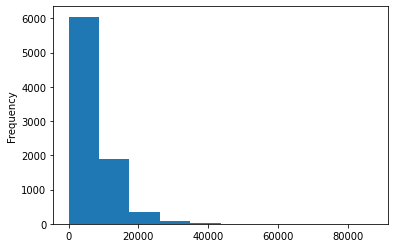

In [ ]:
train_data.text.apply(lambda x:len(x.split())).plot(kind='hist')

In [ ]:
train_data.describe()

,label
count,8419.000000
mean,5.153700
std,3.597489
min,-1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,14.000000


In [ ]:
train_data.shape

(8419, 2)

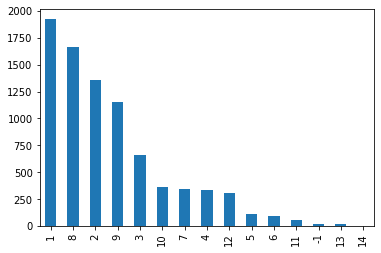

In [ ]:
train_data['label'].value_counts().sort_values(ascending=False).plot(kind='bar')
#unbalanced dataset - distribution of datapoints is not the same for all the labels

In [ ]:
#remove the non-alphanumeric characters from the text 
import re 
def clean_txt(text):
  text = re.sub("'", "",text)
  text=re.sub("(\\W)+"," ",text)     #() -- to match the sequence inside it , \-- to escape the special characters , 
                                     #\W -- get all the nonalphanumeric characters, + --all the instances 

  return text

In [ ]:
train_data['text']=train_data.text.apply(clean_txt)
train_data.head()

,text,label
0,Halliburton Oil Well Cementing Co v Walker Mr...,8
1,Rehearing Denied Dec 16 1946 See Mr Claude T B...,1
2,Rehearing Denied Dec 16 1946 See Appeal from t...,8
3,Mr Walter J Cummings Jr of Washington D C for ...,2
4,Mr A Devitt Vaneck of Washington D C for petit...,8


In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
#Installing the BERT module
!pip install bert-tensorflow
#!pip install bert-for-tf2

import bert
from bert import optimization

!pip install -q tf-models-official==2.4.0

import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 6.0 MB/s 
     |████████████████████████████████| 596 kB 71.4 MB/s 
     |████████████████████████████████| 99 kB 12.5 MB/s 
     |████████████████████████████████| 234 kB 81.5 MB/s 
     |████████████████████████████████| 352 kB 80.4 MB/s 
     |████████████████████████████████| 1.1 MB 68.4 MB/s 
     |████████████████████████████████| 47.7 MB 174 kB/s 
     |████████████████████████████████| 1.2 MB 62.1 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 462 kB 70.3 MB/s 


In [ ]:
print(tf.__version__)

2.8.0


# Setting the output Directory for BERT

In [ ]:
#Setting the output directory for BERT 
# Set the output directory for saving model file
OUTPUT_DIR = '/content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.io.gfile.DeleteRecursively(OUTPUT_DIR)#deletes everything under the directory recursively
  except:
    pass

tf.io.gfile.makedirs(OUTPUT_DIR) #Creates a directory and all parent/intermediate directories.
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new *****


In [ ]:
print("Training Set Shape :", train_data.shape)

Training Set Shape : (8419, 2)


In [ ]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'
# The list containing all the classes (train['SECTION'].unique())


# Splitting the Data into smaller chunks

In [ ]:
train_data['text']

0        Halliburton Oil Well Cementing Co v Walker Mr...
1       Rehearing Denied Dec 16 1946 See Mr Claude T B...
2       Rehearing Denied Dec 16 1946 See Appeal from t...
3       Mr Walter J Cummings Jr of Washington D C for ...
4       Mr A Devitt Vaneck of Washington D C for petit...
                              ...                        
8414    Opinion reported Ante p 88 DECREE 1 It is orde...
8415    In this dispute between Utah and the United St...
8416    The United States to the exclusion of defendan...
8417    Louisianas exception to the portion of the Spe...
8418    To resolve a dispute over the ownership of cer...
Name: text, Length: 8419, dtype: object

In [ ]:
#Splitting the data into smaller chunks 
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200] #overlapping 50 words in every chunks 
      l_total.append(" ".join(l_parcial))
  return l_total

In [ ]:
def get_split_count(text1):
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  return n

In [ ]:
train_data['text_split'] = train_data[DATA_COLUMN].apply(get_split)
train_data.head()

,text,label,text_split
0,Halliburton Oil Well Cementing Co v Walker Mr...,8,[Halliburton Oil Well Cementing Co v Walker Mr...
1,Rehearing Denied Dec 16 1946 See Mr Claude T B...,1,[Rehearing Denied Dec 16 1946 See Mr Claude T ...
2,Rehearing Denied Dec 16 1946 See Appeal from t...,8,[Rehearing Denied Dec 16 1946 See Appeal from ...
3,Mr Walter J Cummings Jr of Washington D C for ...,2,[Mr Walter J Cummings Jr of Washington D C for...
4,Mr A Devitt Vaneck of Washington D C for petit...,8,[Mr A Devitt Vaneck of Washington D C for peti...


In [ ]:
train_data['text_split_count'] = train_data[DATA_COLUMN].apply(get_split_count)
train_data.head()

,text,label,text_split,text_split_count
0,Halliburton Oil Well Cementing Co v Walker Mr...,8,[Halliburton Oil Well Cementing Co v Walker Mr...,26
1,Rehearing Denied Dec 16 1946 See Mr Claude T B...,1,[Rehearing Denied Dec 16 1946 See Mr Claude T ...,29
2,Rehearing Denied Dec 16 1946 See Appeal from t...,8,[Rehearing Denied Dec 16 1946 See Appeal from ...,20
3,Mr Walter J Cummings Jr of Washington D C for ...,2,[Mr Walter J Cummings Jr of Washington D C for...,51
4,Mr A Devitt Vaneck of Washington D C for petit...,8,[Mr A Devitt Vaneck of Washington D C for peti...,8


In [ ]:
y=(lambda x: x['text_split_count']==598,train_data)

In [ ]:
for i,x in enumerate(train_data.text_split_count):
  if x==598:
     print(i)

7462


In [ ]:
len(train_data[DATA_COLUMN][7462].split())

89821

In [ ]:
#file2 = open(r"/content/drive/MyDrive/MS_Final_Project/MyFile2.txt","w+")

In [ ]:
#file2.write(str(train_data['text_split_count'].value_counts()))

In [ ]:
Dict_1 = {}
for i in train_data['text_split_count']:
  if i in Dict_1:
     Dict_1[i] = Dict_1[i] +1
  else:
     Dict_1[i] =1
  

In [ ]:
Dict_1[26]

110

In [ ]:
def fillin(chunk_count):
  if chunk_count in Dict_1:
    return Dict_1[chunk_count]

In [ ]:
train_data['data_count']= train_data['text_split_count'].apply(fillin)

In [ ]:
train_data

,text,label,text_split,text_split_count,data_count
0,Halliburton Oil Well Cementing Co v Walker Mr...,8,[Halliburton Oil Well Cementing Co v Walker Mr...,26,110
1,Rehearing Denied Dec 16 1946 See Mr Claude T B...,1,[Rehearing Denied Dec 16 1946 See Mr Claude T ...,29,120
2,Rehearing Denied Dec 16 1946 See Appeal from t...,8,[Rehearing Denied Dec 16 1946 See Appeal from ...,20,124
3,Mr Walter J Cummings Jr of Washington D C for ...,2,[Mr Walter J Cummings Jr of Washington D C for...,51,84
4,Mr A Devitt Vaneck of Washington D C for petit...,8,[Mr A Devitt Vaneck of Washington D C for peti...,8,94
...,...,...,...,...,...
8414,Opinion reported Ante p 88 DECREE 1 It is orde...,11,[Opinion reported Ante p 88 DECREE 1 It is ord...,2,104
8415,In this dispute between Utah and the United St...,10,[In this dispute between Utah and the United S...,5,93
8416,The United States to the exclusion of defendan...,10,[The United States to the exclusion of defenda...,28,137
8417,Louisianas exception to the portion of the Spe...,11,[Louisianas exception to the portion of the Sp...,12,107


# Preprocessing the Train data 

In [ ]:
#remove the chunks which has only 1 example 
train_data_filtered = train_data[train_data['data_count'] !=1]
#train_data_filtered = train_data_filtered[train_data_filtered['label'] !=14]
train_data_filtered.shape , train_data.shape

((8358, 5), (8419, 5))

In [ ]:
train_data_filtered['label'].value_counts()

 1     1911
 8     1661
 2     1345
 9     1147
 3      649
 10     362
 7      345
 4      334
 12     304
 5      106
 6       98
 11      57
-1       23
 13      15
 14       1
Name: label, dtype: int64

In [ ]:
train_data = train_data_filtered

In [ ]:
train_data.shape

(8358, 5)

In [ ]:
len(train_data)

8358

In [ ]:
label_list = [x for x in np.unique(train_data.label)]
label_list

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, test_size=0.2, random_state=35)
train.head()

,text,label,text_split,text_split_count,data_count
7046,Petitioner Gebser a high school student in res...,2,[Petitioner Gebser a high school student in re...,77,50
8010,Respondent Moore and two accomplices attacked ...,2,[Respondent Moore and two accomplices attacked...,39,104
7441,An Iowa law that among other things authorized...,8,[An Iowa law that among other things authorize...,15,99
3221,Three judge district court was improperly conv...,9,[Three judge district court was improperly con...,15,99
5201,Respondent certified public accountant firm as...,12,[Respondent certified public accountant firm a...,38,96


In [ ]:
train.reset_index(drop=True, inplace=True)
train.head(2)

,text,label,text_split,text_split_count,data_count
0,Petitioner Gebser a high school student in res...,2,[Petitioner Gebser a high school student in re...,77,50
1,Respondent Moore and two accomplices attacked ...,2,[Respondent Moore and two accomplices attacked...,39,104


In [ ]:
val.reset_index(drop=True, inplace=True)
val.head(2)

,text,label,text_split,text_split_count,data_count
0,Per Curiam We granted certiorari in this case ...,9,[Per Curiam We granted certiorari in this case...,6,91
1,Railroad cars are connected by couplers consis...,8,[Railroad cars are connected by couplers consi...,34,113


In [ ]:
train.shape, val.shape

((6686, 5), (1672, 5))

In [ ]:
train_l = []
label_l = []
index_l =[]
for idx,row in train.iterrows():
  for l in row['text_split']:  #it is going to create list of training chunks with label and index mapping 
    train_l.append(l)
    label_l.append(row['label'])
    index_l.append(idx)
len(train_l), len(label_l), len(index_l)

(298263, 298263, 298263)

In [ ]:
val_l = []
val_label_l = []
val_index_l = []
for idx,row in val.iterrows():
  for l in row['text_split']:
    val_l.append(l)
    val_label_l.append(row['label'])
    val_index_l.append(idx)
len(val_l), len(val_label_l), len(val_index_l)

(74034, 74034, 74034)

In [ ]:
train_df = pd.DataFrame({DATA_COLUMN:train_l, LABEL_COLUMN:label_l})
train_df.head()

,text,label
0,Petitioner Gebser a high school student in res...,2
1,IX for teacher student sexual harassment unles...,2
2,Title IX is also enforceable through an implie...,2
3,private action is judicially implied however a...,2
4,in what amounts essentially to a contract betw...,2


In [ ]:
val_df = pd.DataFrame({DATA_COLUMN:val_l, LABEL_COLUMN:val_label_l})
val_df.head()

,text,label
0,Per Curiam We granted certiorari in this case ...,9
1,after reversing on that ground remanded for fu...,9
2,review of the federal issue by this Court and ...,9
3,to swallow the rule See Flynt v Ohio 451 U S 6...,9
4,section It is our obligation to raise any ques...,9


In [ ]:
print('train_df shape : ',train_df.shape)
print('val_df shape : ',val_df.shape)

train_df shape :  (298263, 2)
val_df shape :  (74034, 2)


# BERT: Data Preprocessing

In [ ]:
class PaddingInputExample(object):
      pass

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

In [ ]:
train_InputExamples_1 = train_df.apply(lambda x: InputExample(guid=None,
                                                                  text_a = x[DATA_COLUMN], 
                                                                  text_b = None, 
                                                                  label = x[LABEL_COLUMN]), axis = 1)

In [ ]:
train_InputExamples_1

0         <__main__.InputExample object at 0x7f7cfb9c86d0>
1         <__main__.InputExample object at 0x7f7cfb9b02d0>
2         <__main__.InputExample object at 0x7f7cfb9b00d0>
3         <__main__.InputExample object at 0x7f7cfb9b0710>
4         <__main__.InputExample object at 0x7f7cfb9b0250>
                                ...                       
298258    <__main__.InputExample object at 0x7f7cf69db890>
298259    <__main__.InputExample object at 0x7f7cf69db8d0>
298260    <__main__.InputExample object at 0x7f7cf69db910>
298261    <__main__.InputExample object at 0x7f7cf69db950>
298262    <__main__.InputExample object at 0x7f7cf69db990>
Length: 298263, dtype: object

In [ ]:
print("Row 0 - guid of training set : ", train_InputExamples_1.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples_1.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples_1.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples_1.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  Petitioner Gebser a high school student in respondent Lago Vista Independent School District had a sexual relationship with one of her teachers She did not report the relationship to school officials After the couple was discovered having sex and the teacher was arrested Lago Vista terminated his employment During this time the district had not distributed an official grievance procedure for lodging sexual harassment complaints or a formal antiharassment policy as required by federal regulations Petitioners filed suit raising among other things a claim for damages against Lago Vista under Title IX of the Education Amendments of 1972 which provides in pertinent part that a person cannot be subjected to discrimination under any education program or activity receiving Federal financial assistance 20 U S C 1681 a The Federal District Court granted Lago Vista summary judgment In affirming the Fifth Circuit he

In [ ]:
val_InputExamples_1 = val_df.apply(lambda x: InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

# BERT: Loading the pre-trained model

In [ ]:
import official.nlp.bert.tokenization as tokenization

In [ ]:
# ##We are creatung the tokens to gorm the vocabulary which inturn is ued to represent the words
# #BERT: Loading the pre-trained model
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.compat.v1.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
tokenized_inputs = tokenizer.tokenize(text_test[0])

In [ ]:
len(tokenized_inputs)

1068

In [ ]:
import pdfplumber
text_test=[]
with pdfplumber.open(r'/content/drive/MyDrive/EEPaper_Classification/Arxiv/1702.02905.pdf') as pdf:
    first_page = pdf.pages[0]
    text_test.append(first_page.extract_text())

In [ ]:
len(tokenizer.vocab.keys())

30522

In [ ]:
#Defining Input features 
class InputFeatures(object):
  """A single set of features of data."""

  def __init__(self,
               input_ids,
               input_mask,
               segment_ids,
               label_id,
               is_real_example=True):
    self.input_ids = input_ids
    self.input_mask = input_mask
    self.segment_ids = segment_ids
    self.label_id = label_id
    self.is_real_example = is_real_example

In [ ]:
def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

In [ ]:
def convert_examples_to_features(tokenizer, examples, max_seq_length=200):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels,features = [], [], [], [],[]
    for example in tqdm.tqdm(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )

        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)

        feature = InputFeatures(input_ids=input_id,
        input_mask=input_mask,
        segment_ids=segment_id,
        label_id=label,
        is_real_example=True)

        features.append(feature)
    # return(
    #     np.array(input_ids),
    #     np.array(input_masks),
    #     np.array(segment_ids),
    #     np.array(labels).reshape(-1, 1),
    # )
    return features

In [ ]:
import tqdm
MAX_SEQ_LENGTH = 200

In [ ]:
# Convert our train and validation features to InputFeatures that BERT understands.

train_features = convert_examples_to_features(tokenizer, train_InputExamples_1, MAX_SEQ_LENGTH)

val_features = convert_examples_to_features(tokenizer, val_InputExamples_1, MAX_SEQ_LENGTH)


Converting examples to features: 100%|██████████| 74034/74034 [04:26<00:00, 277.84it/s]


In [ ]:
print("Sentence : ", train_InputExamples_1.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples_1.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  Petitioner Gebser a high school student in respondent Lago Vista Independent School District had a sexual relationship with one of her teachers She did not report the relationship to school officials After the couple was discovered having sex and the teacher was arrested Lago Vista terminated his employment During this time the district had not distributed an official grievance procedure for lodging sexual harassment complaints or a formal antiharassment policy as required by federal regulations Petitioners filed suit raising among other things a claim for damages against Lago Vista under Title IX of the Education Amendments of 1972 which provides in pertinent part that a person cannot be subjected to discrimination under any education program or activity receiving Federal financial assistance 20 U S C 1681 a The Federal District Court granted Lago Vista summary judgment In affirming the Fifth Circuit held that school districts are not liable under Title IX for teacher stud

In [ ]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]
  # with tf.Session() as sess:
  output_layer1 = bert_outputs["pooled_output"]
  # output_layer1 = 999
  hidden_size = output_layer.shape[-1]

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.8)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs, output_layer1)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [ ]:
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg,
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs, output_layer) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)
      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels,
          'pooled_output': output_layer
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [ ]:
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 1.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# # Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:
num_train_steps, len(label_list)

(9320, 15)

In [ ]:
#Initializing the model and the estimator   <USE THIS BLOCK IF YOU ARE TRAINING FOR THE FIRST TIME>
# model_fn = model_fn_builder(
#   num_labels=len(label_list),
#   learning_rate=LEARNING_RATE,
#   num_train_steps=num_train_steps,
#   num_warmup_steps=num_warmup_steps)

# estimator = tf.estimator.Estimator(
#   model_fn=model_fn,
#   config=run_config,
#   params={"batch_size": BATCH_SIZE})

In [ ]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)

  def input_fn(params):
    """The actual input function."""
    batch_size = params["batch_size"]

    num_examples = len(features)

    # This is for demo purposes and does NOT scale to large data sets. We do
    # not use Dataset.from_generator() because that uses tf.py_func which is
    # not TPU compatible. The right way to load data is with TFRecordReader.
    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

In [ ]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
import datetime

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# #Run this If you want to load the model 
# #Loading a specific check point : 
warm_start = tf.estimator.WarmStartSettings(ckpt_to_initialize_from='/content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt-9320.meta')


model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator=tf.estimator.Estimator(model_fn=model_fn,
                       config=run_config,
                       params={"batch_size": BATCH_SIZE},
                       warm_start_from=warm_start)

INFO:tensorflow:Using config: {'_model_dir': '/content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#Evaluation of the BERT model
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-10-20T07:02:08


INFO:tensorflow:Starting evaluation at 2021-10-20T07:02:08


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt-9320


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt-9320


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 587.43142s


INFO:tensorflow:Inference Time : 587.43142s


INFO:tensorflow:Finished evaluation at 2021-10-20-07:11:56


INFO:tensorflow:Finished evaluation at 2021-10-20-07:11:56


INFO:tensorflow:Saving dict for global step 9320: eval_accuracy = 0.6930059, false_negatives = 0.0, false_positives = 0.0, global_step = 9320, loss = 1.0176531, true_negatives = 0.0, true_positives = 74034.0


INFO:tensorflow:Saving dict for global step 9320: eval_accuracy = 0.6930059, false_negatives = 0.0, false_positives = 0.0, global_step = 9320, loss = 1.0176531, true_negatives = 0.0, true_positives = 74034.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9320: /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt-9320


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9320: /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt-9320


{'eval_accuracy': 0.6930059,
 'false_negatives': 0.0,
 'false_positives': 0.0,
 'global_step': 9320,
 'loss': 1.0176531,
 'true_negatives': 0.0,
 'true_positives': 74034.0}

# Extract Embeddings from BERT

In [ ]:
def serving_input_receiver_fn():
    """Serving input_fn that builds features from placeholders

    Returns
    -------
    tf.estimator.export.ServingInputReceiver
    """
    number = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='number')
    receiver_tensors = {'number': number}
    features = tf.tile(number, multiples=[1, 2])
    return tf.estimator.export.ServingInputReceiver(features, receiver_tensors)

In [ ]:
# A method to get predictions
def getPrediction(in_sentences, type_output = "features"):
  #A list to map the actual labels to the predictions
  labels = np.unique(train['label'])
  input_examples = [InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  #input_features = convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
  input_features = convert_examples_to_features(tokenizer,input_examples,MAX_SEQ_LENGTH )
  #Predicting the classes 
  predict_input_fn = input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  if type_output == "features":
    return [prediction['pooled_output'] for _,prediction in enumerate(predictions) ]
  else:
    return ([(sentence, prediction['probabilities'],
              prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)])

In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
MAX_SEQ_LENGTH

200

In [ ]:
train_df.shape, val_df.shape

((298263, 2), (74034, 2))

In [ ]:
val_emb = np.apply_along_axis(getPrediction, 0,np.array(val_df[DATA_COLUMN]))

Converting examples to features: 100%|██████████| 74034/74034 [04:23<00:00, 281.09it/s]


In [ ]:
tr_emb = np.apply_along_axis(getPrediction, 0,np.array(train_df[DATA_COLUMN]))

Converting examples to features: 100%|██████████| 298263/298263 [17:56<00:00, 277.06it/s]


In [ ]:
 tr_emb.shape,val_emb.shape

((298263, 768), (74034, 768))

In [ ]:
aux = -1
len_l = 0
train_x = {}
for l, emb in zip(index_l, tr_emb):
  if l in train_x.keys():
    train_x[l]  =np.vstack([train_x[l], emb])
  else:
    train_x[l] = [emb]

len(train_x.keys())

train_l_final = []
label_l_final = []
for k in train_x.keys():
  train_l_final.append(train_x[k])
  label_l_final.append(train.loc[k]['label'])

df_train = pd.DataFrame({'emb': train_l_final, 'label': label_l_final, })
df_train.head()

,emb,label
0,"[[0.761625, -0.6890287, -0.8929352, 0.52680624...",2
1,"[[0.79925686, -0.44415906, -0.7602632, 0.73962...",2
2,"[[0.6973284, -0.6152221, -0.43651927, 0.843210...",8
3,"[[0.5865909, 0.37060556, -0.94824535, 0.602346...",9
4,"[[0.67915654, -0.45188794, -0.56244737, 0.8673...",12


In [ ]:
def finding_mean(mat):
    return np.mean(mat, axis=0)

In [ ]:
df_train['mean_emb'] = df_train['emb'].apply(finding_mean)

In [ ]:
aux = -1
len_l = 0
val_x = {}

for l, emb in zip(val_index_l, val_emb):
  if l in val_x.keys():
    val_x[l]  =np.vstack([val_x[l], emb])
  else:
    val_x[l] = [emb]


val_l_final = []
vlabel_l_final = []
for k in val_x.keys():
  val_l_final.append(val_x[k])
  vlabel_l_final.append(val.loc[k]['label'])

df_val = pd.DataFrame({'emb': val_l_final, 'label': vlabel_l_final})
df_val.head()

,emb,label
0,"[[0.8937049, -0.2710066, -0.95506686, 0.660035...",9
1,"[[0.65283126, -0.68300706, -0.5725611, 0.58989...",8
2,"[[0.843124, -0.55755526, -0.9464561, 0.7092045...",1
3,"[[0.8386736, -0.45566854, -0.85836506, 0.79570...",1
4,"[[0.5313255, -0.7429057, -0.67960423, 0.741064...",2


In [ ]:
df_val['mean_emb'] = df_val['emb'].apply(finding_mean)

In [ ]:
df_val, df_test = train_test_split(df_val, test_size=0.4, random_state=35)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((6686, 3), (1003, 3), (669, 3))

In [ ]:
len(df_train['label'].unique())

15

In [ ]:
df_train

,emb,label,mean_emb
0,"[[0.761625, -0.6890287, -0.8929352, 0.52680624...",2,"[0.7151956, -0.62477875, -0.6646522, 0.4392995..."
1,"[[0.79925686, -0.44415906, -0.7602632, 0.73962...",2,"[0.80932754, -0.44671714, -0.8104776, 0.733538..."
2,"[[0.6973284, -0.6152221, -0.43651927, 0.843210...",8,"[0.77826583, -0.50409573, 0.1869426, 0.5930283..."
3,"[[0.5865909, 0.37060556, -0.94824535, 0.602346...",9,"[0.60397124, -0.09542633, -0.7656243, 0.445989..."
4,"[[0.67915654, -0.45188794, -0.56244737, 0.8673...",12,"[0.71425104, -0.37907395, -0.28752637, 0.80338..."
...,...,...,...
6681,"[[0.8062169, 0.6083178, -0.9030112, 0.2192684,...",3,"[0.650705, 0.7433955, -0.60138893, 0.29416633,..."
6682,"[[0.7539201, -0.4153865, -0.57286525, 0.773547...",1,"[0.70741403, -0.3779964, -0.5563972, 0.7342689..."
6683,"[[0.84988344, -0.2868986, -0.89382565, 0.73898...",1,"[0.73711437, -0.3041852, -0.73326707, 0.726269..."
6684,"[[0.69411206, 0.3433199, -0.97343034, 0.431670...",3,"[0.69411206, 0.3433199, -0.97343034, 0.4316709..."


# Transformer Model Data Creation

In [ ]:
#Masking the input for same length 
num_features=768
def input_generator(df):
    x_list= df['emb'].to_list()
    y_list= df.label.to_list()
    timesteps = len(max(df['emb'].to_list(), key=len))
    x_train= np.full((df['emb'].shape[0], timesteps, num_features), -99.)
    y_train = np.zeros((df['emb'].shape[0],  1))
    for b in range(len(x_list)):
        x_train[b, 0:len(x_list[b]), :] = x_list[b]
        y_train[b]=y_list[b]
    return x_train, y_train

In [ ]:
x_train_new,y_train_new=input_generator(df_train)
x_train_new.shape, y_train_new.shape

((6686, 298, 768), (6686, 1))

In [ ]:
x_val_new,y_val_new=input_generator(df_val)
x_val_new.shape, y_val_new.shape

((1003, 257, 768), (1003, 1))

In [ ]:
x_test_new,y_test_new=input_generator(df_test)
x_test_new.shape, y_test_new.shape

((669, 199, 768), (669, 1))

# Transformer Model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        #self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        print(positions)
        #x = self.token_emb(x)
        print(x)
        return x + positions


In [ ]:
vocab_size = 30  # Only consider the top 20k words
maxlen = 4  # Only consider the first 200 words of each movie review

In [ ]:

embed_dim = 768  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(None,768,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
x = inputs
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x,True)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_trans = keras.Model(inputs=inputs, outputs=outputs)


Tensor("token_and_position_embedding/embedding/embedding_lookup/Identity_1:0", shape=(?, 768), dtype=float32)
Tensor("input_1:0", shape=(?, ?, 768), dtype=float32)


In [ ]:
model_trans.compile(tf.keras.optimizers.Adam(clipvalue=0.5), "sparse_categorical_crossentropy", metrics=["accuracy"])
model_trans.fit(x_train_new, y_train_new, batch_size=32, epochs=40, validation_data=(x_val_new, y_val_new))

Train on 6686 samples, validate on 1003 samples
Epoch 1/40
6686/6686 [==============================] - ETA: 0s - loss: nan - acc: 4.4870e-04

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6686/6686 [==============================] - 22s 3ms/sample - loss: nan - acc: 4.4870e-04 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/40
6686/6686 [==============================] - 21s 3ms/sample - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/40
6686/6686 [================

In [ ]:
x_test_new,y_test_new=input_generator(df_test)
x_test_new.shape, y_test_new.shape

In [ ]:
y_proba=model.predict(x_test_new)

In [ ]:
y_pred=[]
for i in y_proba:
    max_index_row = np.argmax(i, axis=0)
    y_pred.append(max_index_row)

In [ ]:
#Evaluating Model Performance by creating confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_pred, df_test['label']))
print('Classification Report')
print(classification_report(y_pred, df_test['label']))

In [ ]:
mat = confusion_matrix(y_pred, df_test['label'])

diag = np.diagonal(mat)
print('No of correctly identified labels :',sum(diag))
print('No of misclassified samples : ',sum(sum(mat))-sum(diag))

# LSTM Model

In [ ]:
num_sequences = len(df_train['emb'].to_list())
batch_size = 2
batches_per_epoch =  3343
assert batch_size * batches_per_epoch == num_sequences
num_features= 768
def train_generator(df):
    x_list= df['emb'].to_list()
    y_list =  df.label.to_list()
    # Generate batches
    while True:
        for b in range(batches_per_epoch):
            longest_index = (b + 1) * batch_size - 1
            timesteps = len(max(df['emb'].to_list()[:(b + 1) * batch_size][-batch_size:], key=len))
            x_train = np.full((batch_size, timesteps, num_features), -99.)
            y_train = np.zeros((batch_size,  1))
            for i in range(batch_size):
                li = b * batch_size + i
                x_train[i, 0:len(x_list[li]), :] = x_list[li]
                y_train[i] = y_list[li]
            yield x_train, y_train

In [ ]:
num_sequences_val = len(df_val['emb'].to_list())
batch_size_val = 1
batches_per_epoch_val = 1003
assert batch_size_val * batches_per_epoch_val == num_sequences_val
num_features= 768
def val_generator(df):
    x_list= df['emb'].to_list()
    y_list =  df.label.to_list()
    # Generate batches
    while True:
        for b in range(batches_per_epoch_val):
            longest_index = (b + 1) * batch_size_val - 1
            timesteps = len(max(df['emb'].to_list()[:(b + 1) * batch_size_val][-31:], key=len))
            # print(len(df_train['emb'].to_list()[:b+batch_size][-7:]))
            x_train = np.full((batch_size_val, timesteps, num_features), -99.)
            y_train = np.zeros((batch_size_val,  1))
            for i in range(batch_size_val):
                li = b * batch_size_val + i
                # print("li", li)
                # print(x_train[i, 0:len(x_list[li]), :].shape, len(x_list[li]))
                x_train[i, 0:len(x_list[li]), :] = x_list[li]
                y_train[i] = y_list[li]
            yield x_train, y_train

array([[ 0.761625  , -0.6890287 , -0.8929352 , ...,  0.59881866,
         0.4418676 , -0.95067453],
       [ 0.72603333, -0.6732694 , -0.82303375, ...,  0.58387864,
         0.34267616, -0.9337799 ],
       [ 0.63446146, -0.70858604, -0.3570387 , ...,  0.55784464,
        -0.137733  , -0.7434025 ],
       ...,
       [ 0.8064782 , -0.5543739 , -0.9403947 , ...,  0.8099732 ,
         0.58800054, -0.9699927 ],
       [ 0.63534653, -0.6438985 , -0.84655607, ...,  0.7189933 ,
         0.4186685 , -0.9543223 ],
       [ 0.9063658 , -0.3042424 , -0.28096098, ...,  0.8023774 ,
         0.2822425 , -0.82185245]], dtype=float32)

In [ ]:
from keras import layers
from keras.layers import Embedding, Dense, Input, concatenate, Layer, Lambda, Dropout, Activation
from keras.models import Sequential, Model
text_input = Input(shape=(None,768,), dtype='float32', name='text')

l_mask = layers.Masking(mask_value=-99.)(text_input)
# Which we encoded in a single vector via a LSTM
encoded_text = layers.LSTM(100,)(l_mask)
out_dense = layers.Dense(30, activation='relu')(encoded_text)
# And we add a softmax classifier on top
out = layers.Dense(len(df_train['label'].unique()), activation='softmax')(out_dense)
# At model instantiation, we specify the input and the output:
model = Model(text_input, out)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            [(None, None, 768)]       0         
_________________________________________________________________
masking (Masking)            (None, None, 768)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               347600    
_________________________________________________________________
dense (Dense)                (None, 30)                3030      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
Total params: 351,095
Trainable params: 351,095
Non-trainable params: 0
_________________________________________________________________


In [ ]:
label_list

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
from keras.callbacks import ReduceLROnPlateau
call_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.95, patience=3, verbose=2,mode='auto', min_delta=0.01, cooldown=0, min_lr=0)

In [ ]:
model.fit_generator(train_generator(df_train), steps_per_epoch=batches_per_epoch, epochs=10,
                    validation_data=val_generator(df_val), validation_steps=batches_per_epoch_val, callbacks =[call_reduce] )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:1228: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


3342/3343 [============================>.] - ETA: 0s - batch: 1670.5000 - size: 2.0000 - loss: nan - acc: 0.0824

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3343/3343 [==============================] - 194s 58ms/step - batch: 1671.0000 - size: 2.0000 - loss: nan - acc: 0.0824 - val_loss: nan - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 2/10
3343/3343 [==============================] - 194s 58ms/step - batch: 1671.0000 - size: 2.0000 - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 3/10
3343/3343 [==============================] - 194s 58ms/step - batch: 1671.0000 - size: 2.0000 - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 4/10
3343/3343 [==============================] - ETA: 0s - batch: 1671.0000 - size: 2.0000 - loss: nan - acc: 0.0000e+00
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.
3343/3343 [==============================] - 194s 58ms/step - batch: 1671.0000 - size: 2.0000 - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 5/10
3343/3343 [==============================] - 193s 58ms/step - b

In [ ]:
num_sequences_val = len(df_test['mean_emb'].to_list())
batch_size_val = 4
batches_per_epoch_val = 343
assert batch_size_val * batches_per_epoch_val == num_sequences_val
num_features= 768
model.evaluate_generator(val_generator(df_test), steps= batches_per_epoch_val)

In [ ]:
y_proba=model.predict(val_generator(df_test), steps= batches_per_epoch_val)

In [ ]:
y_pred=[]
for i in y_proba:
    max_index_row = np.argmax(i, axis=0)
    y_pred.append(max_index_row)


#Evaluating Model Performance by creating confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_pred, df_test['label']))
print('Classification Report')
print(classification_report(y_pred, df_test['label']))

In [ ]:
mat = confusion_matrix(y_pred, df_test['label'])

diag = np.diagonal(mat)
sum(diag)

In [ ]:
# # #BERT: Fine Tuning Training & Evaluating
# # print(f'Beginning Training!')
# # #current_time = datetime.time()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
# # #print("Training took time ", datetime.now() - current_time)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.786269, step = 0


INFO:tensorflow:loss = 2.786269, step = 0


INFO:tensorflow:global_step/sec: 1.19897


INFO:tensorflow:global_step/sec: 1.19897


INFO:tensorflow:loss = 2.0663974, step = 100 (83.407 sec)


INFO:tensorflow:loss = 2.0663974, step = 100 (83.407 sec)


INFO:tensorflow:global_step/sec: 1.36386


INFO:tensorflow:global_step/sec: 1.36386


INFO:tensorflow:loss = 2.3754432, step = 200 (73.321 sec)


INFO:tensorflow:loss = 2.3754432, step = 200 (73.321 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300...


INFO:tensorflow:Saving checkpoints for 300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300...


INFO:tensorflow:global_step/sec: 1.18565


INFO:tensorflow:global_step/sec: 1.18565


INFO:tensorflow:loss = 1.6070282, step = 300 (84.343 sec)


INFO:tensorflow:loss = 1.6070282, step = 300 (84.343 sec)


INFO:tensorflow:global_step/sec: 1.36386


INFO:tensorflow:global_step/sec: 1.36386


INFO:tensorflow:loss = 1.0247687, step = 400 (73.321 sec)


INFO:tensorflow:loss = 1.0247687, step = 400 (73.321 sec)


INFO:tensorflow:global_step/sec: 1.36474


INFO:tensorflow:global_step/sec: 1.36474


INFO:tensorflow:loss = 1.6271518, step = 500 (73.274 sec)


INFO:tensorflow:loss = 1.6271518, step = 500 (73.274 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...


INFO:tensorflow:Saving checkpoints for 600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...


INFO:tensorflow:global_step/sec: 1.21157


INFO:tensorflow:global_step/sec: 1.21157


INFO:tensorflow:loss = 0.6455477, step = 600 (82.537 sec)


INFO:tensorflow:loss = 0.6455477, step = 600 (82.537 sec)


INFO:tensorflow:global_step/sec: 1.36425


INFO:tensorflow:global_step/sec: 1.36425


INFO:tensorflow:loss = 1.0937127, step = 700 (73.301 sec)


INFO:tensorflow:loss = 1.0937127, step = 700 (73.301 sec)


INFO:tensorflow:global_step/sec: 1.36478


INFO:tensorflow:global_step/sec: 1.36478


INFO:tensorflow:loss = 1.5450163, step = 800 (73.272 sec)


INFO:tensorflow:loss = 1.5450163, step = 800 (73.272 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 900...


INFO:tensorflow:Saving checkpoints for 900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 900...


INFO:tensorflow:global_step/sec: 1.19364


INFO:tensorflow:global_step/sec: 1.19364


INFO:tensorflow:loss = 1.5892799, step = 900 (83.779 sec)


INFO:tensorflow:loss = 1.5892799, step = 900 (83.779 sec)


INFO:tensorflow:global_step/sec: 1.36439


INFO:tensorflow:global_step/sec: 1.36439


INFO:tensorflow:loss = 1.0005777, step = 1000 (73.292 sec)


INFO:tensorflow:loss = 1.0005777, step = 1000 (73.292 sec)


INFO:tensorflow:global_step/sec: 1.36476


INFO:tensorflow:global_step/sec: 1.36476


INFO:tensorflow:loss = 1.1758165, step = 1100 (73.273 sec)


INFO:tensorflow:loss = 1.1758165, step = 1100 (73.273 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1200...


INFO:tensorflow:Saving checkpoints for 1200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1200...


INFO:tensorflow:global_step/sec: 1.18787


INFO:tensorflow:global_step/sec: 1.18787


INFO:tensorflow:loss = 1.8257174, step = 1200 (84.184 sec)


INFO:tensorflow:loss = 1.8257174, step = 1200 (84.184 sec)


INFO:tensorflow:global_step/sec: 1.36521


INFO:tensorflow:global_step/sec: 1.36521


INFO:tensorflow:loss = 0.41938508, step = 1300 (73.249 sec)


INFO:tensorflow:loss = 0.41938508, step = 1300 (73.249 sec)


INFO:tensorflow:global_step/sec: 1.36486


INFO:tensorflow:global_step/sec: 1.36486


INFO:tensorflow:loss = 1.694171, step = 1400 (73.267 sec)


INFO:tensorflow:loss = 1.694171, step = 1400 (73.267 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1500...


INFO:tensorflow:Saving checkpoints for 1500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1500...


INFO:tensorflow:global_step/sec: 1.20064


INFO:tensorflow:global_step/sec: 1.20064


INFO:tensorflow:loss = 1.5835507, step = 1500 (83.289 sec)


INFO:tensorflow:loss = 1.5835507, step = 1500 (83.289 sec)


INFO:tensorflow:global_step/sec: 1.36464


INFO:tensorflow:global_step/sec: 1.36464


INFO:tensorflow:loss = 0.86959124, step = 1600 (73.280 sec)


INFO:tensorflow:loss = 0.86959124, step = 1600 (73.280 sec)


INFO:tensorflow:global_step/sec: 1.365


INFO:tensorflow:global_step/sec: 1.365


INFO:tensorflow:loss = 1.0527254, step = 1700 (73.264 sec)


INFO:tensorflow:loss = 1.0527254, step = 1700 (73.264 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1800...


INFO:tensorflow:Saving checkpoints for 1800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1800...


INFO:tensorflow:global_step/sec: 1.1952


INFO:tensorflow:global_step/sec: 1.1952


INFO:tensorflow:loss = 1.0440811, step = 1800 (83.665 sec)


INFO:tensorflow:loss = 1.0440811, step = 1800 (83.665 sec)


INFO:tensorflow:global_step/sec: 1.36509


INFO:tensorflow:global_step/sec: 1.36509


INFO:tensorflow:loss = 0.5234606, step = 1900 (73.255 sec)


INFO:tensorflow:loss = 0.5234606, step = 1900 (73.255 sec)


INFO:tensorflow:global_step/sec: 1.36533


INFO:tensorflow:global_step/sec: 1.36533


INFO:tensorflow:loss = 1.1672359, step = 2000 (73.243 sec)


INFO:tensorflow:loss = 1.1672359, step = 2000 (73.243 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2100...


INFO:tensorflow:Saving checkpoints for 2100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2100...


INFO:tensorflow:global_step/sec: 1.20478


INFO:tensorflow:global_step/sec: 1.20478


INFO:tensorflow:loss = 0.51128495, step = 2100 (83.002 sec)


INFO:tensorflow:loss = 0.51128495, step = 2100 (83.002 sec)


INFO:tensorflow:global_step/sec: 1.36518


INFO:tensorflow:global_step/sec: 1.36518


INFO:tensorflow:loss = 2.0397556, step = 2200 (73.250 sec)


INFO:tensorflow:loss = 2.0397556, step = 2200 (73.250 sec)


INFO:tensorflow:global_step/sec: 1.3658


INFO:tensorflow:global_step/sec: 1.3658


INFO:tensorflow:loss = 0.7021867, step = 2300 (73.218 sec)


INFO:tensorflow:loss = 0.7021867, step = 2300 (73.218 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2400...


INFO:tensorflow:Saving checkpoints for 2400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2400...


INFO:tensorflow:global_step/sec: 1.19466


INFO:tensorflow:global_step/sec: 1.19466


INFO:tensorflow:loss = 1.499382, step = 2400 (83.705 sec)


INFO:tensorflow:loss = 1.499382, step = 2400 (83.705 sec)


INFO:tensorflow:global_step/sec: 1.36551


INFO:tensorflow:global_step/sec: 1.36551


INFO:tensorflow:loss = 1.7312766, step = 2500 (73.233 sec)


INFO:tensorflow:loss = 1.7312766, step = 2500 (73.233 sec)


INFO:tensorflow:global_step/sec: 1.36567


INFO:tensorflow:global_step/sec: 1.36567


INFO:tensorflow:loss = 1.5683838, step = 2600 (73.224 sec)


INFO:tensorflow:loss = 1.5683838, step = 2600 (73.224 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2700...


INFO:tensorflow:Saving checkpoints for 2700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2700...


INFO:tensorflow:global_step/sec: 1.2056


INFO:tensorflow:global_step/sec: 1.2056


INFO:tensorflow:loss = 0.794837, step = 2700 (82.946 sec)


INFO:tensorflow:loss = 0.794837, step = 2700 (82.946 sec)


INFO:tensorflow:global_step/sec: 1.36548


INFO:tensorflow:global_step/sec: 1.36548


INFO:tensorflow:loss = 1.4396913, step = 2800 (73.235 sec)


INFO:tensorflow:loss = 1.4396913, step = 2800 (73.235 sec)


INFO:tensorflow:global_step/sec: 1.36592


INFO:tensorflow:global_step/sec: 1.36592


INFO:tensorflow:loss = 1.1650459, step = 2900 (73.211 sec)


INFO:tensorflow:loss = 1.1650459, step = 2900 (73.211 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3000...


INFO:tensorflow:Saving checkpoints for 3000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3000...


INFO:tensorflow:global_step/sec: 1.19619


INFO:tensorflow:global_step/sec: 1.19619


INFO:tensorflow:loss = 1.4445186, step = 3000 (83.598 sec)


INFO:tensorflow:loss = 1.4445186, step = 3000 (83.598 sec)


INFO:tensorflow:global_step/sec: 1.36558


INFO:tensorflow:global_step/sec: 1.36558


INFO:tensorflow:loss = 0.45257258, step = 3100 (73.229 sec)


INFO:tensorflow:loss = 0.45257258, step = 3100 (73.229 sec)


INFO:tensorflow:global_step/sec: 1.36597


INFO:tensorflow:global_step/sec: 1.36597


INFO:tensorflow:loss = 1.7510269, step = 3200 (73.208 sec)


INFO:tensorflow:loss = 1.7510269, step = 3200 (73.208 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3300...


INFO:tensorflow:Saving checkpoints for 3300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3300...


INFO:tensorflow:global_step/sec: 1.18259


INFO:tensorflow:global_step/sec: 1.18259


INFO:tensorflow:loss = 0.76953125, step = 3300 (84.560 sec)


INFO:tensorflow:loss = 0.76953125, step = 3300 (84.560 sec)


INFO:tensorflow:global_step/sec: 1.36574


INFO:tensorflow:global_step/sec: 1.36574


INFO:tensorflow:loss = 0.74654174, step = 3400 (73.220 sec)


INFO:tensorflow:loss = 0.74654174, step = 3400 (73.220 sec)


INFO:tensorflow:global_step/sec: 1.36671


INFO:tensorflow:global_step/sec: 1.36671


INFO:tensorflow:loss = 1.3249454, step = 3500 (73.169 sec)


INFO:tensorflow:loss = 1.3249454, step = 3500 (73.169 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3600...


INFO:tensorflow:Saving checkpoints for 3600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3600...


INFO:tensorflow:global_step/sec: 1.19484


INFO:tensorflow:global_step/sec: 1.19484


INFO:tensorflow:loss = 0.23610237, step = 3600 (83.692 sec)


INFO:tensorflow:loss = 0.23610237, step = 3600 (83.692 sec)


INFO:tensorflow:global_step/sec: 1.3659


INFO:tensorflow:global_step/sec: 1.3659


INFO:tensorflow:loss = 1.2820082, step = 3700 (73.213 sec)


INFO:tensorflow:loss = 1.2820082, step = 3700 (73.213 sec)


INFO:tensorflow:global_step/sec: 1.36579


INFO:tensorflow:global_step/sec: 1.36579


INFO:tensorflow:loss = 0.3301756, step = 3800 (73.217 sec)


INFO:tensorflow:loss = 0.3301756, step = 3800 (73.217 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3900...


INFO:tensorflow:Saving checkpoints for 3900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3900...


INFO:tensorflow:global_step/sec: 1.20322


INFO:tensorflow:global_step/sec: 1.20322


INFO:tensorflow:loss = 1.0689893, step = 3900 (83.110 sec)


INFO:tensorflow:loss = 1.0689893, step = 3900 (83.110 sec)


INFO:tensorflow:global_step/sec: 1.36581


INFO:tensorflow:global_step/sec: 1.36581


INFO:tensorflow:loss = 1.7709603, step = 4000 (73.217 sec)


INFO:tensorflow:loss = 1.7709603, step = 4000 (73.217 sec)


INFO:tensorflow:global_step/sec: 1.36624


INFO:tensorflow:global_step/sec: 1.36624


INFO:tensorflow:loss = 0.63623613, step = 4100 (73.195 sec)


INFO:tensorflow:loss = 0.63623613, step = 4100 (73.195 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4200...


INFO:tensorflow:Saving checkpoints for 4200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4200...


INFO:tensorflow:global_step/sec: 1.19694


INFO:tensorflow:global_step/sec: 1.19694


INFO:tensorflow:loss = 0.58196324, step = 4200 (83.545 sec)


INFO:tensorflow:loss = 0.58196324, step = 4200 (83.545 sec)


INFO:tensorflow:global_step/sec: 1.36595


INFO:tensorflow:global_step/sec: 1.36595


INFO:tensorflow:loss = 0.9257285, step = 4300 (73.210 sec)


INFO:tensorflow:loss = 0.9257285, step = 4300 (73.210 sec)


INFO:tensorflow:global_step/sec: 1.36657


INFO:tensorflow:global_step/sec: 1.36657


INFO:tensorflow:loss = 0.9744998, step = 4400 (73.175 sec)


INFO:tensorflow:loss = 0.9744998, step = 4400 (73.175 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4500...


INFO:tensorflow:Saving checkpoints for 4500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4500...


INFO:tensorflow:global_step/sec: 1.20531


INFO:tensorflow:global_step/sec: 1.20531


INFO:tensorflow:loss = 0.48619005, step = 4500 (82.967 sec)


INFO:tensorflow:loss = 0.48619005, step = 4500 (82.967 sec)


INFO:tensorflow:global_step/sec: 1.36607


INFO:tensorflow:global_step/sec: 1.36607


INFO:tensorflow:loss = 1.2223177, step = 4600 (73.202 sec)


INFO:tensorflow:loss = 1.2223177, step = 4600 (73.202 sec)


INFO:tensorflow:global_step/sec: 1.36626


INFO:tensorflow:global_step/sec: 1.36626


INFO:tensorflow:loss = 1.0583326, step = 4700 (73.193 sec)


INFO:tensorflow:loss = 1.0583326, step = 4700 (73.193 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4800...


INFO:tensorflow:Saving checkpoints for 4800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4800...


INFO:tensorflow:global_step/sec: 1.19726


INFO:tensorflow:global_step/sec: 1.19726


INFO:tensorflow:loss = 0.9330783, step = 4800 (83.524 sec)


INFO:tensorflow:loss = 0.9330783, step = 4800 (83.524 sec)


INFO:tensorflow:global_step/sec: 1.36573


INFO:tensorflow:global_step/sec: 1.36573


INFO:tensorflow:loss = 0.82622683, step = 4900 (73.221 sec)


INFO:tensorflow:loss = 0.82622683, step = 4900 (73.221 sec)


INFO:tensorflow:global_step/sec: 1.36591


INFO:tensorflow:global_step/sec: 1.36591


INFO:tensorflow:loss = 0.24337527, step = 5000 (73.211 sec)


INFO:tensorflow:loss = 0.24337527, step = 5000 (73.211 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5100...


INFO:tensorflow:Saving checkpoints for 5100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5100...


INFO:tensorflow:global_step/sec: 1.20668


INFO:tensorflow:global_step/sec: 1.20668


INFO:tensorflow:loss = 0.31419456, step = 5100 (82.872 sec)


INFO:tensorflow:loss = 0.31419456, step = 5100 (82.872 sec)


INFO:tensorflow:global_step/sec: 1.36615


INFO:tensorflow:global_step/sec: 1.36615


INFO:tensorflow:loss = 0.4229453, step = 5200 (73.199 sec)


INFO:tensorflow:loss = 0.4229453, step = 5200 (73.199 sec)


INFO:tensorflow:global_step/sec: 1.36537


INFO:tensorflow:global_step/sec: 1.36537


INFO:tensorflow:loss = 2.934936, step = 5300 (73.240 sec)


INFO:tensorflow:loss = 2.934936, step = 5300 (73.240 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5400...


INFO:tensorflow:Saving checkpoints for 5400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5400...


INFO:tensorflow:global_step/sec: 1.19714


INFO:tensorflow:global_step/sec: 1.19714


INFO:tensorflow:loss = 0.070232086, step = 5400 (83.532 sec)


INFO:tensorflow:loss = 0.070232086, step = 5400 (83.532 sec)


INFO:tensorflow:global_step/sec: 1.36557


INFO:tensorflow:global_step/sec: 1.36557


INFO:tensorflow:loss = 0.46018443, step = 5500 (73.230 sec)


INFO:tensorflow:loss = 0.46018443, step = 5500 (73.230 sec)


INFO:tensorflow:global_step/sec: 1.36628


INFO:tensorflow:global_step/sec: 1.36628


INFO:tensorflow:loss = 0.4089306, step = 5600 (73.192 sec)


INFO:tensorflow:loss = 0.4089306, step = 5600 (73.192 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5700...


INFO:tensorflow:Saving checkpoints for 5700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5700...


INFO:tensorflow:global_step/sec: 1.19709


INFO:tensorflow:global_step/sec: 1.19709


INFO:tensorflow:loss = 1.4355438, step = 5700 (83.535 sec)


INFO:tensorflow:loss = 1.4355438, step = 5700 (83.535 sec)


INFO:tensorflow:global_step/sec: 1.366


INFO:tensorflow:global_step/sec: 1.366


INFO:tensorflow:loss = 0.671728, step = 5800 (73.207 sec)


INFO:tensorflow:loss = 0.671728, step = 5800 (73.207 sec)


INFO:tensorflow:global_step/sec: 1.36658


INFO:tensorflow:global_step/sec: 1.36658


INFO:tensorflow:loss = 1.8712063, step = 5900 (73.175 sec)


INFO:tensorflow:loss = 1.8712063, step = 5900 (73.175 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6000...


INFO:tensorflow:Saving checkpoints for 6000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6000...


INFO:tensorflow:global_step/sec: 1.19446


INFO:tensorflow:global_step/sec: 1.19446


INFO:tensorflow:loss = 0.5477371, step = 6000 (83.720 sec)


INFO:tensorflow:loss = 0.5477371, step = 6000 (83.720 sec)


INFO:tensorflow:global_step/sec: 1.36618


INFO:tensorflow:global_step/sec: 1.36618


INFO:tensorflow:loss = 1.2504054, step = 6100 (73.198 sec)


INFO:tensorflow:loss = 1.2504054, step = 6100 (73.198 sec)


INFO:tensorflow:global_step/sec: 1.36617


INFO:tensorflow:global_step/sec: 1.36617


INFO:tensorflow:loss = 0.7919806, step = 6200 (73.196 sec)


INFO:tensorflow:loss = 0.7919806, step = 6200 (73.196 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6300...


INFO:tensorflow:Saving checkpoints for 6300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6300...


INFO:tensorflow:global_step/sec: 1.21317


INFO:tensorflow:global_step/sec: 1.21317


INFO:tensorflow:loss = 0.90849304, step = 6300 (82.428 sec)


INFO:tensorflow:loss = 0.90849304, step = 6300 (82.428 sec)


INFO:tensorflow:global_step/sec: 1.3658


INFO:tensorflow:global_step/sec: 1.3658


INFO:tensorflow:loss = 0.89618725, step = 6400 (73.218 sec)


INFO:tensorflow:loss = 0.89618725, step = 6400 (73.218 sec)


INFO:tensorflow:global_step/sec: 1.36614


INFO:tensorflow:global_step/sec: 1.36614


INFO:tensorflow:loss = 0.66827, step = 6500 (73.199 sec)


INFO:tensorflow:loss = 0.66827, step = 6500 (73.199 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6600...


INFO:tensorflow:Saving checkpoints for 6600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6600...


INFO:tensorflow:global_step/sec: 1.21207


INFO:tensorflow:global_step/sec: 1.21207


INFO:tensorflow:loss = 0.71387726, step = 6600 (82.503 sec)


INFO:tensorflow:loss = 0.71387726, step = 6600 (82.503 sec)


INFO:tensorflow:global_step/sec: 1.36651


INFO:tensorflow:global_step/sec: 1.36651


INFO:tensorflow:loss = 0.32209152, step = 6700 (73.179 sec)


INFO:tensorflow:loss = 0.32209152, step = 6700 (73.179 sec)


INFO:tensorflow:global_step/sec: 1.3668


INFO:tensorflow:global_step/sec: 1.3668


INFO:tensorflow:loss = 0.2335478, step = 6800 (73.164 sec)


INFO:tensorflow:loss = 0.2335478, step = 6800 (73.164 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6900...


INFO:tensorflow:Saving checkpoints for 6900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6900...


INFO:tensorflow:global_step/sec: 1.20886


INFO:tensorflow:global_step/sec: 1.20886


INFO:tensorflow:loss = 1.4508913, step = 6900 (82.722 sec)


INFO:tensorflow:loss = 1.4508913, step = 6900 (82.722 sec)


INFO:tensorflow:global_step/sec: 1.36588


INFO:tensorflow:global_step/sec: 1.36588


INFO:tensorflow:loss = 0.6445544, step = 7000 (73.214 sec)


INFO:tensorflow:loss = 0.6445544, step = 7000 (73.214 sec)


INFO:tensorflow:global_step/sec: 1.36632


INFO:tensorflow:global_step/sec: 1.36632


INFO:tensorflow:loss = 1.6879997, step = 7100 (73.190 sec)


INFO:tensorflow:loss = 1.6879997, step = 7100 (73.190 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7200...


INFO:tensorflow:Saving checkpoints for 7200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7200...


INFO:tensorflow:global_step/sec: 1.19829


INFO:tensorflow:global_step/sec: 1.19829


INFO:tensorflow:loss = 1.7114764, step = 7201 (83.451 sec)


INFO:tensorflow:loss = 1.7114764, step = 7201 (83.451 sec)


INFO:tensorflow:global_step/sec: 1.36646


INFO:tensorflow:global_step/sec: 1.36646


INFO:tensorflow:loss = 0.12836885, step = 7300 (73.183 sec)


INFO:tensorflow:loss = 0.12836885, step = 7300 (73.183 sec)


INFO:tensorflow:global_step/sec: 1.36656


INFO:tensorflow:global_step/sec: 1.36656


INFO:tensorflow:loss = 0.9945121, step = 7400 (73.175 sec)


INFO:tensorflow:loss = 0.9945121, step = 7400 (73.175 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7500...


INFO:tensorflow:Saving checkpoints for 7500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7500...


INFO:tensorflow:global_step/sec: 1.19593


INFO:tensorflow:global_step/sec: 1.19593


INFO:tensorflow:loss = 1.8419349, step = 7500 (83.619 sec)


INFO:tensorflow:loss = 1.8419349, step = 7500 (83.619 sec)


INFO:tensorflow:global_step/sec: 1.36639


INFO:tensorflow:global_step/sec: 1.36639


INFO:tensorflow:loss = 0.69577765, step = 7600 (73.185 sec)


INFO:tensorflow:loss = 0.69577765, step = 7600 (73.185 sec)


INFO:tensorflow:global_step/sec: 1.36654


INFO:tensorflow:global_step/sec: 1.36654


INFO:tensorflow:loss = 0.9120759, step = 7700 (73.177 sec)


INFO:tensorflow:loss = 0.9120759, step = 7700 (73.177 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7800...


INFO:tensorflow:Saving checkpoints for 7800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7800...


INFO:tensorflow:global_step/sec: 1.19269


INFO:tensorflow:global_step/sec: 1.19269


INFO:tensorflow:loss = 0.30054948, step = 7800 (83.844 sec)


INFO:tensorflow:loss = 0.30054948, step = 7800 (83.844 sec)


INFO:tensorflow:global_step/sec: 1.36541


INFO:tensorflow:global_step/sec: 1.36541


INFO:tensorflow:loss = 3.096624, step = 7900 (73.238 sec)


INFO:tensorflow:loss = 3.096624, step = 7900 (73.238 sec)


INFO:tensorflow:global_step/sec: 1.36542


INFO:tensorflow:global_step/sec: 1.36542


INFO:tensorflow:loss = 0.7234505, step = 8000 (73.238 sec)


INFO:tensorflow:loss = 0.7234505, step = 8000 (73.238 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8100...


INFO:tensorflow:Saving checkpoints for 8100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8100...


INFO:tensorflow:global_step/sec: 1.19733


INFO:tensorflow:global_step/sec: 1.19733


INFO:tensorflow:loss = 1.4943554, step = 8100 (83.523 sec)


INFO:tensorflow:loss = 1.4943554, step = 8100 (83.523 sec)


INFO:tensorflow:global_step/sec: 1.36549


INFO:tensorflow:global_step/sec: 1.36549


INFO:tensorflow:loss = 0.9056092, step = 8200 (73.230 sec)


INFO:tensorflow:loss = 0.9056092, step = 8200 (73.230 sec)


INFO:tensorflow:global_step/sec: 1.36547


INFO:tensorflow:global_step/sec: 1.36547


INFO:tensorflow:loss = 0.39496925, step = 8300 (73.235 sec)


INFO:tensorflow:loss = 0.39496925, step = 8300 (73.235 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8400...


INFO:tensorflow:Saving checkpoints for 8400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8400...


INFO:tensorflow:global_step/sec: 1.20386


INFO:tensorflow:global_step/sec: 1.20386


INFO:tensorflow:loss = 0.046922304, step = 8400 (83.066 sec)


INFO:tensorflow:loss = 0.046922304, step = 8400 (83.066 sec)


INFO:tensorflow:global_step/sec: 1.3654


INFO:tensorflow:global_step/sec: 1.3654


INFO:tensorflow:loss = 0.4456226, step = 8500 (73.239 sec)


INFO:tensorflow:loss = 0.4456226, step = 8500 (73.239 sec)


INFO:tensorflow:global_step/sec: 1.36484


INFO:tensorflow:global_step/sec: 1.36484


INFO:tensorflow:loss = 1.3229629, step = 8600 (73.269 sec)


INFO:tensorflow:loss = 1.3229629, step = 8600 (73.269 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8700...


INFO:tensorflow:Saving checkpoints for 8700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8700...


INFO:tensorflow:global_step/sec: 1.18766


INFO:tensorflow:global_step/sec: 1.18766


INFO:tensorflow:loss = 0.7862363, step = 8700 (84.199 sec)


INFO:tensorflow:loss = 0.7862363, step = 8700 (84.199 sec)


INFO:tensorflow:global_step/sec: 1.36532


INFO:tensorflow:global_step/sec: 1.36532


INFO:tensorflow:loss = 0.84964436, step = 8800 (73.243 sec)


INFO:tensorflow:loss = 0.84964436, step = 8800 (73.243 sec)


INFO:tensorflow:global_step/sec: 1.36508


INFO:tensorflow:global_step/sec: 1.36508


INFO:tensorflow:loss = 0.36582324, step = 8900 (73.256 sec)


INFO:tensorflow:loss = 0.36582324, step = 8900 (73.256 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9000...


INFO:tensorflow:Saving checkpoints for 9000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9000...


INFO:tensorflow:global_step/sec: 1.21289


INFO:tensorflow:global_step/sec: 1.21289


INFO:tensorflow:loss = 1.0224521, step = 9000 (82.448 sec)


INFO:tensorflow:loss = 1.0224521, step = 9000 (82.448 sec)


INFO:tensorflow:global_step/sec: 1.36548


INFO:tensorflow:global_step/sec: 1.36548


INFO:tensorflow:loss = 0.15976629, step = 9100 (73.235 sec)


INFO:tensorflow:loss = 0.15976629, step = 9100 (73.235 sec)


INFO:tensorflow:global_step/sec: 1.36499


INFO:tensorflow:global_step/sec: 1.36499


INFO:tensorflow:loss = 0.9795337, step = 9200 (73.260 sec)


INFO:tensorflow:loss = 0.9795337, step = 9200 (73.260 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9300...


INFO:tensorflow:Saving checkpoints for 9300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9300...


INFO:tensorflow:global_step/sec: 1.20522


INFO:tensorflow:global_step/sec: 1.20522


INFO:tensorflow:loss = 0.8350538, step = 9300 (82.972 sec)


INFO:tensorflow:loss = 0.8350538, step = 9300 (82.972 sec)


INFO:tensorflow:global_step/sec: 1.3651


INFO:tensorflow:global_step/sec: 1.3651


INFO:tensorflow:loss = 0.36981696, step = 9400 (73.255 sec)


INFO:tensorflow:loss = 0.36981696, step = 9400 (73.255 sec)


INFO:tensorflow:global_step/sec: 1.36564


INFO:tensorflow:global_step/sec: 1.36564


INFO:tensorflow:loss = 1.9274237, step = 9500 (73.227 sec)


INFO:tensorflow:loss = 1.9274237, step = 9500 (73.227 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9600...


INFO:tensorflow:Saving checkpoints for 9600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9600...


INFO:tensorflow:global_step/sec: 1.18856


INFO:tensorflow:global_step/sec: 1.18856


INFO:tensorflow:loss = 1.5166929, step = 9600 (84.134 sec)


INFO:tensorflow:loss = 1.5166929, step = 9600 (84.134 sec)


INFO:tensorflow:global_step/sec: 1.36604


INFO:tensorflow:global_step/sec: 1.36604


INFO:tensorflow:loss = 0.6442009, step = 9700 (73.205 sec)


INFO:tensorflow:loss = 0.6442009, step = 9700 (73.205 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9740...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9740...


INFO:tensorflow:Saving checkpoints for 9740 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9740 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9740...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9740...


INFO:tensorflow:Loss for final step: 0.59033394.


INFO:tensorflow:Loss for final step: 0.59033394.


In [ ]:
# # #BERT: Fine Tuning Training & Evaluating
# # print(f'Beginning Training!')
# # #current_time = datetime.time()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
# # #print("Training took time ", datetime.now() - current_time)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 3.057736, step = 0


INFO:tensorflow:loss = 3.057736, step = 0


INFO:tensorflow:global_step/sec: 1.21756


INFO:tensorflow:global_step/sec: 1.21756


INFO:tensorflow:loss = 2.4472058, step = 100 (82.136 sec)


INFO:tensorflow:loss = 2.4472058, step = 100 (82.136 sec)


INFO:tensorflow:global_step/sec: 1.36652


INFO:tensorflow:global_step/sec: 1.36652


INFO:tensorflow:loss = 2.4141452, step = 200 (73.176 sec)


INFO:tensorflow:loss = 2.4141452, step = 200 (73.176 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300...


INFO:tensorflow:Saving checkpoints for 300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300...


INFO:tensorflow:global_step/sec: 1.21329


INFO:tensorflow:global_step/sec: 1.21329


INFO:tensorflow:loss = 2.4170372, step = 300 (82.421 sec)


INFO:tensorflow:loss = 2.4170372, step = 300 (82.421 sec)


INFO:tensorflow:global_step/sec: 1.36699


INFO:tensorflow:global_step/sec: 1.36699


INFO:tensorflow:loss = 1.2039728, step = 400 (73.154 sec)


INFO:tensorflow:loss = 1.2039728, step = 400 (73.154 sec)


INFO:tensorflow:global_step/sec: 1.36753


INFO:tensorflow:global_step/sec: 1.36753


INFO:tensorflow:loss = 2.074347, step = 500 (73.125 sec)


INFO:tensorflow:loss = 2.074347, step = 500 (73.125 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...


INFO:tensorflow:Saving checkpoints for 600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...


INFO:tensorflow:global_step/sec: 1.19847


INFO:tensorflow:global_step/sec: 1.19847


INFO:tensorflow:loss = 0.6584134, step = 600 (83.440 sec)


INFO:tensorflow:loss = 0.6584134, step = 600 (83.440 sec)


INFO:tensorflow:global_step/sec: 1.36753


INFO:tensorflow:global_step/sec: 1.36753


INFO:tensorflow:loss = 1.3256655, step = 700 (73.123 sec)


INFO:tensorflow:loss = 1.3256655, step = 700 (73.123 sec)


INFO:tensorflow:global_step/sec: 1.36794


INFO:tensorflow:global_step/sec: 1.36794


INFO:tensorflow:loss = 0.93053085, step = 800 (73.103 sec)


INFO:tensorflow:loss = 0.93053085, step = 800 (73.103 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 900...


INFO:tensorflow:Saving checkpoints for 900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 900...


INFO:tensorflow:global_step/sec: 1.19385


INFO:tensorflow:global_step/sec: 1.19385


INFO:tensorflow:loss = 3.2955084, step = 900 (83.763 sec)


INFO:tensorflow:loss = 3.2955084, step = 900 (83.763 sec)


INFO:tensorflow:global_step/sec: 1.36742


INFO:tensorflow:global_step/sec: 1.36742


INFO:tensorflow:loss = 0.8088107, step = 1000 (73.130 sec)


INFO:tensorflow:loss = 0.8088107, step = 1000 (73.130 sec)


INFO:tensorflow:global_step/sec: 1.3679


INFO:tensorflow:global_step/sec: 1.3679


INFO:tensorflow:loss = 2.0302134, step = 1100 (73.105 sec)


INFO:tensorflow:loss = 2.0302134, step = 1100 (73.105 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1200...


INFO:tensorflow:Saving checkpoints for 1200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1200...


INFO:tensorflow:global_step/sec: 1.21964


INFO:tensorflow:global_step/sec: 1.21964


INFO:tensorflow:loss = 0.8054831, step = 1200 (81.991 sec)


INFO:tensorflow:loss = 0.8054831, step = 1200 (81.991 sec)


INFO:tensorflow:global_step/sec: 1.36728


INFO:tensorflow:global_step/sec: 1.36728


INFO:tensorflow:loss = 1.042909, step = 1300 (73.138 sec)


INFO:tensorflow:loss = 1.042909, step = 1300 (73.138 sec)


INFO:tensorflow:global_step/sec: 1.36743


INFO:tensorflow:global_step/sec: 1.36743


INFO:tensorflow:loss = 1.2793176, step = 1400 (73.130 sec)


INFO:tensorflow:loss = 1.2793176, step = 1400 (73.130 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1500...


INFO:tensorflow:Saving checkpoints for 1500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1500...


INFO:tensorflow:global_step/sec: 1.20706


INFO:tensorflow:global_step/sec: 1.20706


INFO:tensorflow:loss = 0.70071155, step = 1500 (82.846 sec)


INFO:tensorflow:loss = 0.70071155, step = 1500 (82.846 sec)


INFO:tensorflow:global_step/sec: 1.36787


INFO:tensorflow:global_step/sec: 1.36787


INFO:tensorflow:loss = 0.92373836, step = 1600 (73.106 sec)


INFO:tensorflow:loss = 0.92373836, step = 1600 (73.106 sec)


INFO:tensorflow:global_step/sec: 1.3679


INFO:tensorflow:global_step/sec: 1.3679


INFO:tensorflow:loss = 1.5976117, step = 1700 (73.105 sec)


INFO:tensorflow:loss = 1.5976117, step = 1700 (73.105 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1800...


INFO:tensorflow:Saving checkpoints for 1800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1800...


INFO:tensorflow:global_step/sec: 1.1926


INFO:tensorflow:global_step/sec: 1.1926


INFO:tensorflow:loss = 1.2269316, step = 1800 (83.850 sec)


INFO:tensorflow:loss = 1.2269316, step = 1800 (83.850 sec)


INFO:tensorflow:global_step/sec: 1.36779


INFO:tensorflow:global_step/sec: 1.36779


INFO:tensorflow:loss = 1.3346194, step = 1900 (73.111 sec)


INFO:tensorflow:loss = 1.3346194, step = 1900 (73.111 sec)


INFO:tensorflow:global_step/sec: 1.36801


INFO:tensorflow:global_step/sec: 1.36801


INFO:tensorflow:loss = 0.8181148, step = 2000 (73.100 sec)


INFO:tensorflow:loss = 0.8181148, step = 2000 (73.100 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2100...


INFO:tensorflow:Saving checkpoints for 2100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2100...


INFO:tensorflow:global_step/sec: 1.19446


INFO:tensorflow:global_step/sec: 1.19446


INFO:tensorflow:loss = 1.0887535, step = 2100 (83.719 sec)


INFO:tensorflow:loss = 1.0887535, step = 2100 (83.719 sec)


INFO:tensorflow:global_step/sec: 1.36818


INFO:tensorflow:global_step/sec: 1.36818


INFO:tensorflow:loss = 1.244795, step = 2200 (73.090 sec)


INFO:tensorflow:loss = 1.244795, step = 2200 (73.090 sec)


INFO:tensorflow:global_step/sec: 1.36805


INFO:tensorflow:global_step/sec: 1.36805


INFO:tensorflow:loss = 0.8879913, step = 2300 (73.098 sec)


INFO:tensorflow:loss = 0.8879913, step = 2300 (73.098 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2400...


INFO:tensorflow:Saving checkpoints for 2400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2400...


INFO:tensorflow:global_step/sec: 1.21376


INFO:tensorflow:global_step/sec: 1.21376


INFO:tensorflow:loss = 1.5363333, step = 2400 (82.387 sec)


INFO:tensorflow:loss = 1.5363333, step = 2400 (82.387 sec)


INFO:tensorflow:global_step/sec: 1.36833


INFO:tensorflow:global_step/sec: 1.36833


INFO:tensorflow:loss = 1.9389627, step = 2500 (73.082 sec)


INFO:tensorflow:loss = 1.9389627, step = 2500 (73.082 sec)


INFO:tensorflow:global_step/sec: 1.36801


INFO:tensorflow:global_step/sec: 1.36801


INFO:tensorflow:loss = 0.6972009, step = 2600 (73.099 sec)


INFO:tensorflow:loss = 0.6972009, step = 2600 (73.099 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2700...


INFO:tensorflow:Saving checkpoints for 2700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2700...


INFO:tensorflow:global_step/sec: 1.20721


INFO:tensorflow:global_step/sec: 1.20721


INFO:tensorflow:loss = 0.867026, step = 2700 (82.835 sec)


INFO:tensorflow:loss = 0.867026, step = 2700 (82.835 sec)


INFO:tensorflow:global_step/sec: 1.36763


INFO:tensorflow:global_step/sec: 1.36763


INFO:tensorflow:loss = 0.8283236, step = 2800 (73.119 sec)


INFO:tensorflow:loss = 0.8283236, step = 2800 (73.119 sec)


INFO:tensorflow:global_step/sec: 1.36741


INFO:tensorflow:global_step/sec: 1.36741


INFO:tensorflow:loss = 0.6157304, step = 2900 (73.131 sec)


INFO:tensorflow:loss = 0.6157304, step = 2900 (73.131 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3000...


INFO:tensorflow:Saving checkpoints for 3000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3000...


INFO:tensorflow:global_step/sec: 1.2199


INFO:tensorflow:global_step/sec: 1.2199


INFO:tensorflow:loss = 0.45323533, step = 3000 (81.974 sec)


INFO:tensorflow:loss = 0.45323533, step = 3000 (81.974 sec)


INFO:tensorflow:global_step/sec: 1.36755


INFO:tensorflow:global_step/sec: 1.36755


INFO:tensorflow:loss = 2.4798307, step = 3100 (73.124 sec)


INFO:tensorflow:loss = 2.4798307, step = 3100 (73.124 sec)


INFO:tensorflow:global_step/sec: 1.36776


INFO:tensorflow:global_step/sec: 1.36776


INFO:tensorflow:loss = 0.77805233, step = 3200 (73.112 sec)


INFO:tensorflow:loss = 0.77805233, step = 3200 (73.112 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3300...


INFO:tensorflow:Saving checkpoints for 3300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3300...


INFO:tensorflow:global_step/sec: 1.2095


INFO:tensorflow:global_step/sec: 1.2095


INFO:tensorflow:loss = 0.5914918, step = 3300 (82.680 sec)


INFO:tensorflow:loss = 0.5914918, step = 3300 (82.680 sec)


INFO:tensorflow:global_step/sec: 1.36705


INFO:tensorflow:global_step/sec: 1.36705


INFO:tensorflow:loss = 1.4075019, step = 3400 (73.150 sec)


INFO:tensorflow:loss = 1.4075019, step = 3400 (73.150 sec)


INFO:tensorflow:global_step/sec: 1.36777


INFO:tensorflow:global_step/sec: 1.36777


INFO:tensorflow:loss = 1.6167537, step = 3500 (73.111 sec)


INFO:tensorflow:loss = 1.6167537, step = 3500 (73.111 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3600...


INFO:tensorflow:Saving checkpoints for 3600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3600...


INFO:tensorflow:global_step/sec: 1.19533


INFO:tensorflow:global_step/sec: 1.19533


INFO:tensorflow:loss = 1.9095684, step = 3600 (83.661 sec)


INFO:tensorflow:loss = 1.9095684, step = 3600 (83.661 sec)


INFO:tensorflow:global_step/sec: 1.36702


INFO:tensorflow:global_step/sec: 1.36702


INFO:tensorflow:loss = 0.5305033, step = 3700 (73.149 sec)


INFO:tensorflow:loss = 0.5305033, step = 3700 (73.149 sec)


INFO:tensorflow:global_step/sec: 1.36768


INFO:tensorflow:global_step/sec: 1.36768


INFO:tensorflow:loss = 1.2364789, step = 3800 (73.117 sec)


INFO:tensorflow:loss = 1.2364789, step = 3800 (73.117 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3900...


INFO:tensorflow:Saving checkpoints for 3900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3900...


INFO:tensorflow:global_step/sec: 1.21045


INFO:tensorflow:global_step/sec: 1.21045


INFO:tensorflow:loss = 1.553211, step = 3900 (82.614 sec)


INFO:tensorflow:loss = 1.553211, step = 3900 (82.614 sec)


INFO:tensorflow:global_step/sec: 1.36731


INFO:tensorflow:global_step/sec: 1.36731


INFO:tensorflow:loss = 1.3624243, step = 4000 (73.136 sec)


INFO:tensorflow:loss = 1.3624243, step = 4000 (73.136 sec)


INFO:tensorflow:global_step/sec: 1.36683


INFO:tensorflow:global_step/sec: 1.36683


INFO:tensorflow:loss = 0.56344503, step = 4100 (73.162 sec)


INFO:tensorflow:loss = 0.56344503, step = 4100 (73.162 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4200...


INFO:tensorflow:Saving checkpoints for 4200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4200...


INFO:tensorflow:global_step/sec: 1.20019


INFO:tensorflow:global_step/sec: 1.20019


INFO:tensorflow:loss = 0.3949516, step = 4200 (83.320 sec)


INFO:tensorflow:loss = 0.3949516, step = 4200 (83.320 sec)


INFO:tensorflow:global_step/sec: 1.36665


INFO:tensorflow:global_step/sec: 1.36665


INFO:tensorflow:loss = 0.9048182, step = 4300 (73.172 sec)


INFO:tensorflow:loss = 0.9048182, step = 4300 (73.172 sec)


INFO:tensorflow:global_step/sec: 1.36703


INFO:tensorflow:global_step/sec: 1.36703


INFO:tensorflow:loss = 0.28576922, step = 4400 (73.151 sec)


INFO:tensorflow:loss = 0.28576922, step = 4400 (73.151 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4500...


INFO:tensorflow:Saving checkpoints for 4500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4500...


INFO:tensorflow:global_step/sec: 1.20435


INFO:tensorflow:global_step/sec: 1.20435


INFO:tensorflow:loss = 0.47253805, step = 4500 (83.032 sec)


INFO:tensorflow:loss = 0.47253805, step = 4500 (83.032 sec)


INFO:tensorflow:global_step/sec: 1.36712


INFO:tensorflow:global_step/sec: 1.36712


INFO:tensorflow:loss = 0.7608359, step = 4600 (73.146 sec)


INFO:tensorflow:loss = 0.7608359, step = 4600 (73.146 sec)


INFO:tensorflow:global_step/sec: 1.36675


INFO:tensorflow:global_step/sec: 1.36675


INFO:tensorflow:loss = 1.7427332, step = 4700 (73.167 sec)


INFO:tensorflow:loss = 1.7427332, step = 4700 (73.167 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4800...


INFO:tensorflow:Saving checkpoints for 4800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4800...


INFO:tensorflow:global_step/sec: 1.21526


INFO:tensorflow:global_step/sec: 1.21526


INFO:tensorflow:loss = 0.2423628, step = 4800 (82.287 sec)


INFO:tensorflow:loss = 0.2423628, step = 4800 (82.287 sec)


INFO:tensorflow:global_step/sec: 1.36717


INFO:tensorflow:global_step/sec: 1.36717


INFO:tensorflow:loss = 0.8240371, step = 4900 (73.144 sec)


INFO:tensorflow:loss = 0.8240371, step = 4900 (73.144 sec)


INFO:tensorflow:global_step/sec: 1.36685


INFO:tensorflow:global_step/sec: 1.36685


INFO:tensorflow:loss = 0.28356364, step = 5000 (73.161 sec)


INFO:tensorflow:loss = 0.28356364, step = 5000 (73.161 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5100...


INFO:tensorflow:Saving checkpoints for 5100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5100...


INFO:tensorflow:global_step/sec: 1.19395


INFO:tensorflow:global_step/sec: 1.19395


INFO:tensorflow:loss = 1.0634382, step = 5100 (83.756 sec)


INFO:tensorflow:loss = 1.0634382, step = 5100 (83.756 sec)


INFO:tensorflow:global_step/sec: 1.36653


INFO:tensorflow:global_step/sec: 1.36653


INFO:tensorflow:loss = 1.0019487, step = 5200 (73.177 sec)


INFO:tensorflow:loss = 1.0019487, step = 5200 (73.177 sec)


INFO:tensorflow:global_step/sec: 1.36691


INFO:tensorflow:global_step/sec: 1.36691


INFO:tensorflow:loss = 0.62847733, step = 5300 (73.159 sec)


INFO:tensorflow:loss = 0.62847733, step = 5300 (73.159 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5400...


INFO:tensorflow:Saving checkpoints for 5400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5400...


INFO:tensorflow:global_step/sec: 1.19715


INFO:tensorflow:global_step/sec: 1.19715


INFO:tensorflow:loss = 0.47103807, step = 5400 (83.531 sec)


INFO:tensorflow:loss = 0.47103807, step = 5400 (83.531 sec)


INFO:tensorflow:global_step/sec: 1.36707


INFO:tensorflow:global_step/sec: 1.36707


INFO:tensorflow:loss = 0.3208008, step = 5500 (73.149 sec)


INFO:tensorflow:loss = 0.3208008, step = 5500 (73.149 sec)


INFO:tensorflow:global_step/sec: 1.36682


INFO:tensorflow:global_step/sec: 1.36682


INFO:tensorflow:loss = 0.57154334, step = 5600 (73.162 sec)


INFO:tensorflow:loss = 0.57154334, step = 5600 (73.162 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5700...


INFO:tensorflow:Saving checkpoints for 5700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5700...


INFO:tensorflow:global_step/sec: 1.19414


INFO:tensorflow:global_step/sec: 1.19414


INFO:tensorflow:loss = 0.87002844, step = 5700 (83.743 sec)


INFO:tensorflow:loss = 0.87002844, step = 5700 (83.743 sec)


INFO:tensorflow:global_step/sec: 1.36766


INFO:tensorflow:global_step/sec: 1.36766


INFO:tensorflow:loss = 1.7578844, step = 5800 (73.118 sec)


INFO:tensorflow:loss = 1.7578844, step = 5800 (73.118 sec)


INFO:tensorflow:global_step/sec: 1.3673


INFO:tensorflow:global_step/sec: 1.3673


INFO:tensorflow:loss = 1.174612, step = 5900 (73.137 sec)


INFO:tensorflow:loss = 1.174612, step = 5900 (73.137 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6000...


INFO:tensorflow:Saving checkpoints for 6000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6000...


INFO:tensorflow:global_step/sec: 1.21603


INFO:tensorflow:global_step/sec: 1.21603


INFO:tensorflow:loss = 0.56222284, step = 6000 (82.235 sec)


INFO:tensorflow:loss = 0.56222284, step = 6000 (82.235 sec)


INFO:tensorflow:global_step/sec: 1.367


INFO:tensorflow:global_step/sec: 1.367


INFO:tensorflow:loss = 1.0094796, step = 6100 (73.153 sec)


INFO:tensorflow:loss = 1.0094796, step = 6100 (73.153 sec)


INFO:tensorflow:global_step/sec: 1.36746


INFO:tensorflow:global_step/sec: 1.36746


INFO:tensorflow:loss = 0.27215245, step = 6200 (73.128 sec)


INFO:tensorflow:loss = 0.27215245, step = 6200 (73.128 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6300...


INFO:tensorflow:Saving checkpoints for 6300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6300...


INFO:tensorflow:global_step/sec: 1.19169


INFO:tensorflow:global_step/sec: 1.19169


INFO:tensorflow:loss = 0.64285946, step = 6300 (83.914 sec)


INFO:tensorflow:loss = 0.64285946, step = 6300 (83.914 sec)


INFO:tensorflow:global_step/sec: 1.36715


INFO:tensorflow:global_step/sec: 1.36715


INFO:tensorflow:loss = 1.877237, step = 6400 (73.145 sec)


INFO:tensorflow:loss = 1.877237, step = 6400 (73.145 sec)


INFO:tensorflow:global_step/sec: 1.36721


INFO:tensorflow:global_step/sec: 1.36721


INFO:tensorflow:loss = 0.7070309, step = 6500 (73.142 sec)


INFO:tensorflow:loss = 0.7070309, step = 6500 (73.142 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6600...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6600...


INFO:tensorflow:Saving checkpoints for 6600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6600 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6600...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6600...


INFO:tensorflow:global_step/sec: 1.20592


INFO:tensorflow:global_step/sec: 1.20592


INFO:tensorflow:loss = 0.6009344, step = 6600 (82.924 sec)


INFO:tensorflow:loss = 0.6009344, step = 6600 (82.924 sec)


INFO:tensorflow:global_step/sec: 1.36666


INFO:tensorflow:global_step/sec: 1.36666


INFO:tensorflow:loss = 1.0924196, step = 6700 (73.171 sec)


INFO:tensorflow:loss = 1.0924196, step = 6700 (73.171 sec)


INFO:tensorflow:global_step/sec: 1.3671


INFO:tensorflow:global_step/sec: 1.3671


INFO:tensorflow:loss = 1.2442288, step = 6800 (73.148 sec)


INFO:tensorflow:loss = 1.2442288, step = 6800 (73.148 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6900...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 6900...


INFO:tensorflow:Saving checkpoints for 6900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 6900 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6900...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 6900...


INFO:tensorflow:global_step/sec: 1.19187


INFO:tensorflow:global_step/sec: 1.19187


INFO:tensorflow:loss = 0.3253942, step = 6900 (83.901 sec)


INFO:tensorflow:loss = 0.3253942, step = 6900 (83.901 sec)


INFO:tensorflow:global_step/sec: 1.36706


INFO:tensorflow:global_step/sec: 1.36706


INFO:tensorflow:loss = 0.6448115, step = 7000 (73.150 sec)


INFO:tensorflow:loss = 0.6448115, step = 7000 (73.150 sec)


INFO:tensorflow:global_step/sec: 1.36661


INFO:tensorflow:global_step/sec: 1.36661


INFO:tensorflow:loss = 1.7581704, step = 7100 (73.174 sec)


INFO:tensorflow:loss = 1.7581704, step = 7100 (73.174 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7200...


INFO:tensorflow:Saving checkpoints for 7200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7200 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7200...


INFO:tensorflow:global_step/sec: 1.21758


INFO:tensorflow:global_step/sec: 1.21758


INFO:tensorflow:loss = 0.28678694, step = 7200 (82.130 sec)


INFO:tensorflow:loss = 0.28678694, step = 7200 (82.130 sec)


INFO:tensorflow:global_step/sec: 1.36672


INFO:tensorflow:global_step/sec: 1.36672


INFO:tensorflow:loss = 0.4201708, step = 7300 (73.169 sec)


INFO:tensorflow:loss = 0.4201708, step = 7300 (73.169 sec)


INFO:tensorflow:global_step/sec: 1.36665


INFO:tensorflow:global_step/sec: 1.36665


INFO:tensorflow:loss = 0.9808418, step = 7400 (73.171 sec)


INFO:tensorflow:loss = 0.9808418, step = 7400 (73.171 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7500...


INFO:tensorflow:Saving checkpoints for 7500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7500 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7500...


INFO:tensorflow:global_step/sec: 1.21085


INFO:tensorflow:global_step/sec: 1.21085


INFO:tensorflow:loss = 1.4045044, step = 7500 (82.586 sec)


INFO:tensorflow:loss = 1.4045044, step = 7500 (82.586 sec)


INFO:tensorflow:global_step/sec: 1.36648


INFO:tensorflow:global_step/sec: 1.36648


INFO:tensorflow:loss = 1.7239593, step = 7600 (73.181 sec)


INFO:tensorflow:loss = 1.7239593, step = 7600 (73.181 sec)


INFO:tensorflow:global_step/sec: 1.36619


INFO:tensorflow:global_step/sec: 1.36619


INFO:tensorflow:loss = 0.2880664, step = 7700 (73.197 sec)


INFO:tensorflow:loss = 0.2880664, step = 7700 (73.197 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7800...


INFO:tensorflow:Saving checkpoints for 7800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 7800 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7800...


INFO:tensorflow:global_step/sec: 1.2013


INFO:tensorflow:global_step/sec: 1.2013


INFO:tensorflow:loss = 0.43570226, step = 7800 (83.242 sec)


INFO:tensorflow:loss = 0.43570226, step = 7800 (83.242 sec)


INFO:tensorflow:global_step/sec: 1.36669


INFO:tensorflow:global_step/sec: 1.36669


INFO:tensorflow:loss = 0.40382653, step = 7900 (73.170 sec)


INFO:tensorflow:loss = 0.40382653, step = 7900 (73.170 sec)


INFO:tensorflow:global_step/sec: 1.36598


INFO:tensorflow:global_step/sec: 1.36598


INFO:tensorflow:loss = 1.2657678, step = 8000 (73.207 sec)


INFO:tensorflow:loss = 1.2657678, step = 8000 (73.207 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8100...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8100...


INFO:tensorflow:Saving checkpoints for 8100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8100 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8100...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8100...


INFO:tensorflow:global_step/sec: 1.20965


INFO:tensorflow:global_step/sec: 1.20965


INFO:tensorflow:loss = 1.1372061, step = 8100 (82.669 sec)


INFO:tensorflow:loss = 1.1372061, step = 8100 (82.669 sec)


INFO:tensorflow:global_step/sec: 1.36697


INFO:tensorflow:global_step/sec: 1.36697


INFO:tensorflow:loss = 0.61022186, step = 8200 (73.154 sec)


INFO:tensorflow:loss = 0.61022186, step = 8200 (73.154 sec)


INFO:tensorflow:global_step/sec: 1.36708


INFO:tensorflow:global_step/sec: 1.36708


INFO:tensorflow:loss = 0.18929784, step = 8300 (73.149 sec)


INFO:tensorflow:loss = 0.18929784, step = 8300 (73.149 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8400...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8400...


INFO:tensorflow:Saving checkpoints for 8400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8400 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8400...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8400...


INFO:tensorflow:global_step/sec: 1.19846


INFO:tensorflow:global_step/sec: 1.19846


INFO:tensorflow:loss = 3.0713403, step = 8400 (83.440 sec)


INFO:tensorflow:loss = 3.0713403, step = 8400 (83.440 sec)


INFO:tensorflow:global_step/sec: 1.36711


INFO:tensorflow:global_step/sec: 1.36711


INFO:tensorflow:loss = 0.4870149, step = 8500 (73.154 sec)


INFO:tensorflow:loss = 0.4870149, step = 8500 (73.154 sec)


INFO:tensorflow:global_step/sec: 1.36637


INFO:tensorflow:global_step/sec: 1.36637


INFO:tensorflow:loss = 0.69786775, step = 8600 (73.180 sec)


INFO:tensorflow:loss = 0.69786775, step = 8600 (73.180 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8700...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8700...


INFO:tensorflow:Saving checkpoints for 8700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 8700 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8700...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8700...


INFO:tensorflow:global_step/sec: 1.20965


INFO:tensorflow:global_step/sec: 1.20965


INFO:tensorflow:loss = 0.5281165, step = 8700 (82.668 sec)


INFO:tensorflow:loss = 0.5281165, step = 8700 (82.668 sec)


INFO:tensorflow:global_step/sec: 1.36673


INFO:tensorflow:global_step/sec: 1.36673


INFO:tensorflow:loss = 0.56739664, step = 8800 (73.167 sec)


INFO:tensorflow:loss = 0.56739664, step = 8800 (73.167 sec)


INFO:tensorflow:global_step/sec: 1.36688


INFO:tensorflow:global_step/sec: 1.36688


INFO:tensorflow:loss = 1.3777308, step = 8900 (73.159 sec)


INFO:tensorflow:loss = 1.3777308, step = 8900 (73.159 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9000...


INFO:tensorflow:Saving checkpoints for 9000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9000 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9000...


INFO:tensorflow:global_step/sec: 1.21727


INFO:tensorflow:global_step/sec: 1.21727


INFO:tensorflow:loss = 0.2448903, step = 9000 (82.150 sec)


INFO:tensorflow:loss = 0.2448903, step = 9000 (82.150 sec)


INFO:tensorflow:global_step/sec: 1.36691


INFO:tensorflow:global_step/sec: 1.36691


INFO:tensorflow:loss = 0.66816396, step = 9100 (73.158 sec)


INFO:tensorflow:loss = 0.66816396, step = 9100 (73.158 sec)


INFO:tensorflow:global_step/sec: 1.36639


INFO:tensorflow:global_step/sec: 1.36639


INFO:tensorflow:loss = 0.4615866, step = 9200 (73.185 sec)


INFO:tensorflow:loss = 0.4615866, step = 9200 (73.185 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9300...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9300...


INFO:tensorflow:Saving checkpoints for 9300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9300 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9300...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9300...


INFO:tensorflow:global_step/sec: 1.20099


INFO:tensorflow:global_step/sec: 1.20099


INFO:tensorflow:loss = 1.0034106, step = 9300 (83.264 sec)


INFO:tensorflow:loss = 1.0034106, step = 9300 (83.264 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9320...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9320...


INFO:tensorflow:Saving checkpoints for 9320 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Saving checkpoints for 9320 into /content/drive/MyDrive/MS_Final_Project/Model_checkpoints_SC_new/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9320...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9320...


INFO:tensorflow:Loss for final step: 0.8493731.


INFO:tensorflow:Loss for final step: 0.8493731.
